# Course 9 Lab 6 - Decision Trees

In [18]:
# import Packages
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
# get the dataset
path= 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv'
my_data = pd.read_csv(path, delimiter=",")
my_data[0:5]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [4]:
# what is the size of the data
my_data.shape

(200, 6)

In [5]:
# pre-processing
# x as feature matrix
# y as the response variable
# remove the column containing the target name since it doesnt contain numeric values
X = my_data[['Age','Sex','BP','Cholesterol','Na_to_K']].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [7]:
# convert categorical variables into numerical values using pandas.get_dummies()
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [8]:
# fill the target variable
y = my_data["Drug"]
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

In [10]:
# split data into training and testing sets
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [11]:
# Print the shape of X_trainset and y_trainset. Ensure that the dimensions match.
print('Shape of x trainset',X_trainset.shape)
print('Shape of y trainset',y_trainset.shape)

Shape of x trainset (140, 5)
Shape of y trainset (140,)


In [12]:
# Print the shape of X_testset and y_testset. Ensure that the dimensions match.
print('Shape of x testset',X_testset.shape)
print('Shape of y testset',y_testset.shape)

Shape of x testset (60, 5)
Shape of y testset (60,)


In [13]:
# create instance of decision tree classifier called drugtree
# inside the classifier specify crieterion = entropy
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [14]:
# fit the data with the trainging feature matirx and response vector
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [15]:
# make predictions on test set
predTree = drugTree.predict(X_testset)

In [17]:
# compare predictions to actual
print (predTree [0:5])
print (y_testset [0:5])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


In [19]:
# check accuracy of model
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.9833333333333333


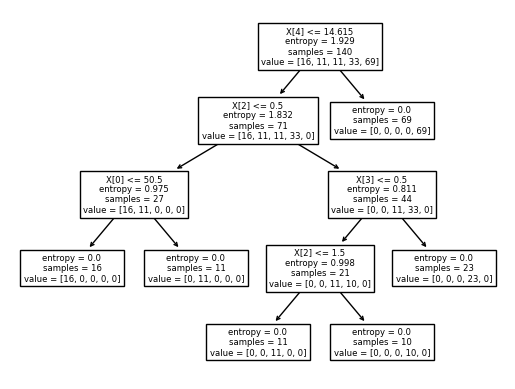

In [20]:
# visualize the tree
tree.plot_tree(drugTree)
plt.show()